In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python 

import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trigonometry etc.
import scipy.signal as signal             # kernel for moving window calculation
import random                             # for randon numbers
import seaborn as sns                     # for matrix scatter plots
from sklearn.impute import SimpleImputer  # basic imputation method
from sklearn.impute import KNNImputer     # k-nearest neighbour imputation method
from sklearn.experimental import enable_iterative_imputer # required for MICE imputation
from sklearn.impute import IterativeImputer # MICE imputation

In [2]:
df = pd.read_csv('HackathonData2024.csv')
response = df['Avg Pump Difference']
x = df['Lateral Length']
df.head()

,Well ID,Avg Pump Difference,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
0,1,-0.93,Acadia,10300,Campbell,10415.0,Coke,1,11100000,Edge,...,4,0.0,0.0,1,0.593758,34,3304.124833,261.7,2719.898438,472.4
1,2,-8.45,Acadia,10300,Campbell,10415.0,Coke,1,11100000,Edge,...,4,0.0,0.0,1,0.597059,67,3301.199254,255.9,2934.885325,747.4
2,3,8.70,Arches,11000,Campbell,8470.0,Orange Crush,0,101111,Middle,...,682,4.5,0.0,11,0.516873,34,2774.407080,184.8,1589.948673,596.9
3,4,NaN,Arches,11000,Campbell,10555.0,Coke,1,11110000,Edge,...,4,0.0,0.0,1,0.501287,30,2653.539415,206.7,1304.162878,551.5
4,5,19.93,Badlands,2300,Campbell,9295.0,Mountain Dew,1,10001101,Edge,...,277,1.0,1.0,2,0.503327,336,NaN,NaN,NaN,NaN


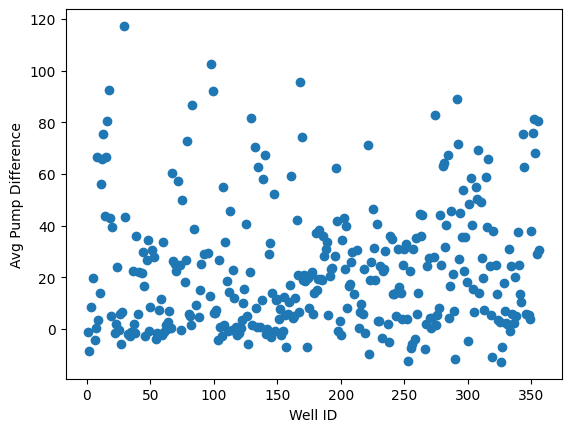

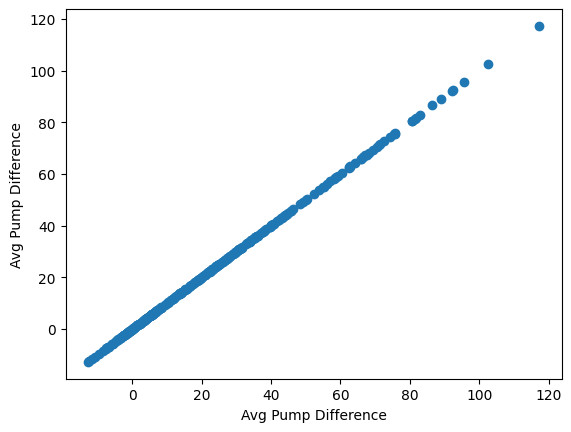

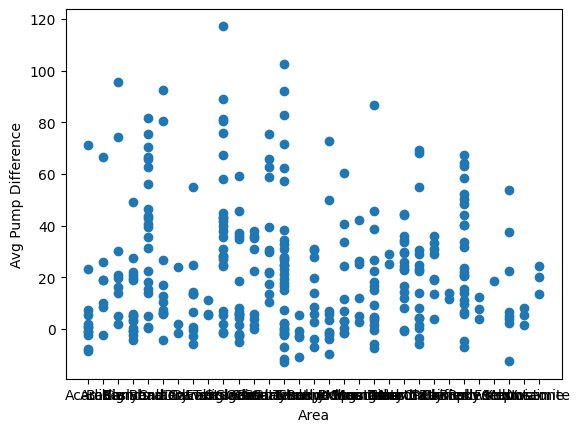

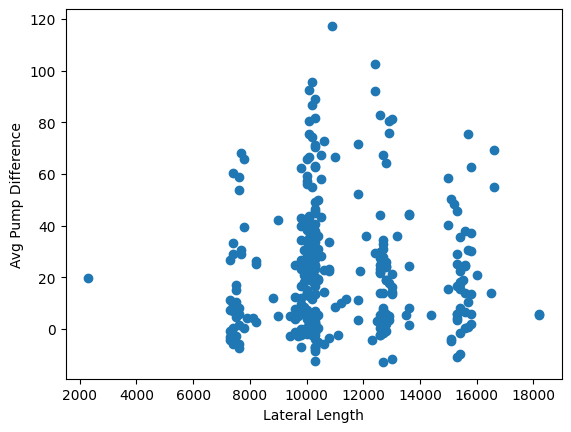

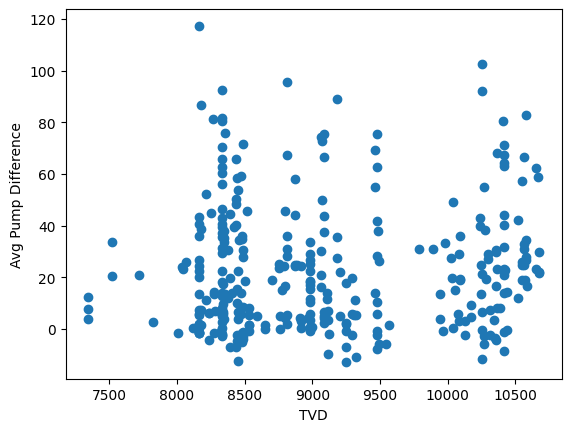

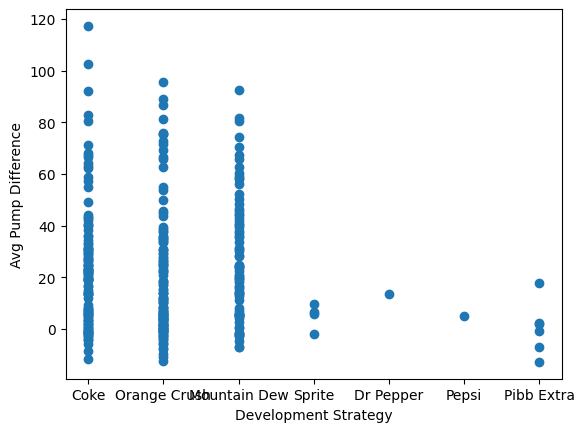

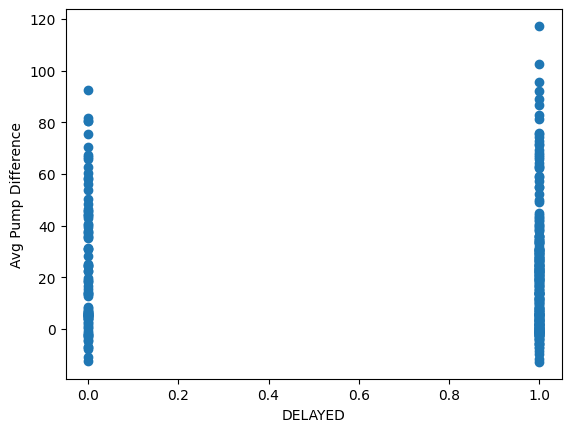

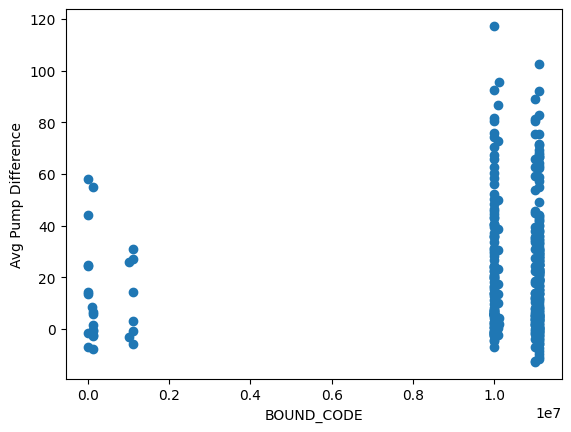

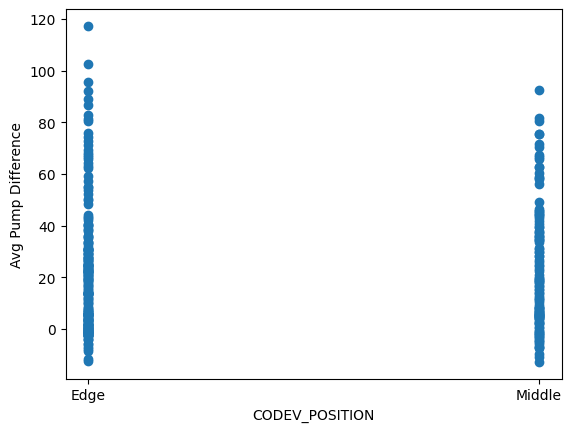

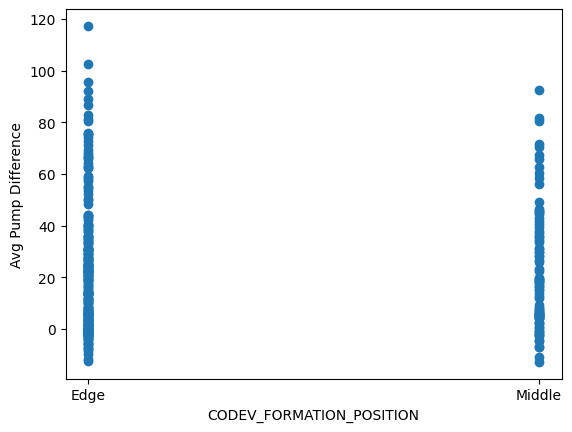

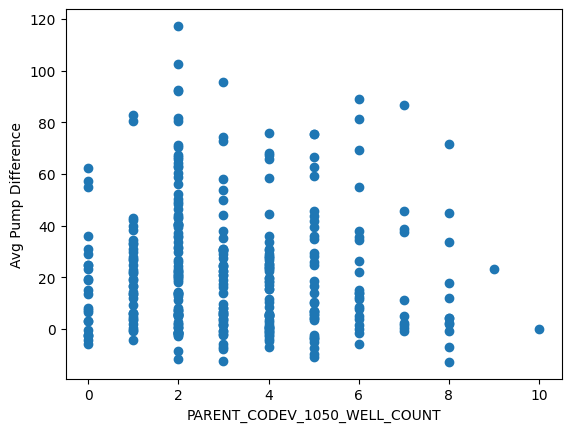

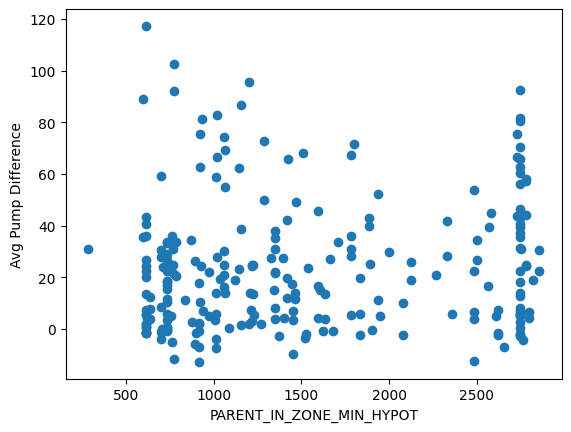

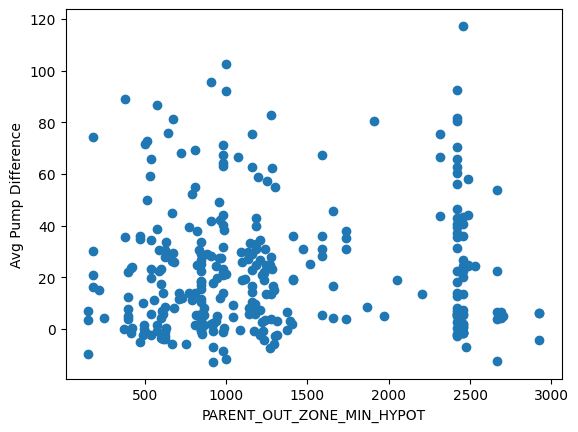

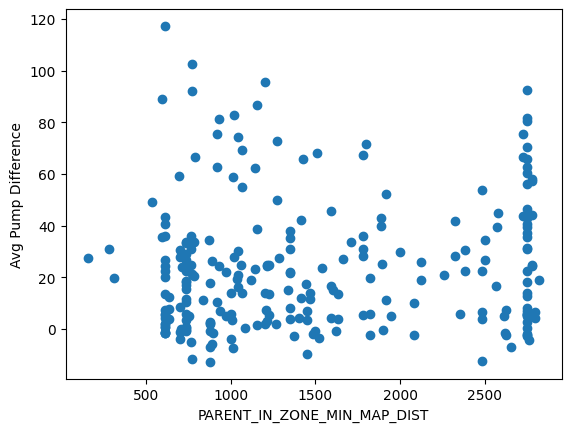

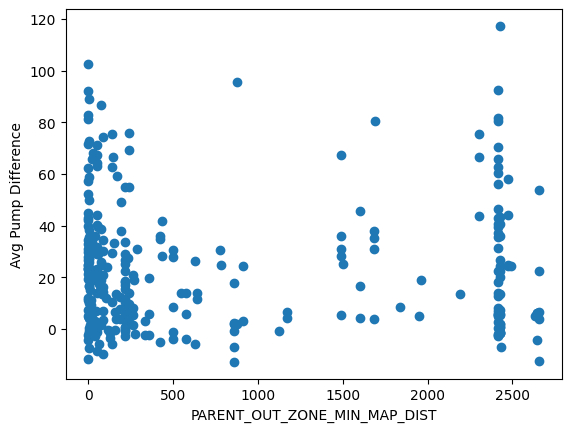

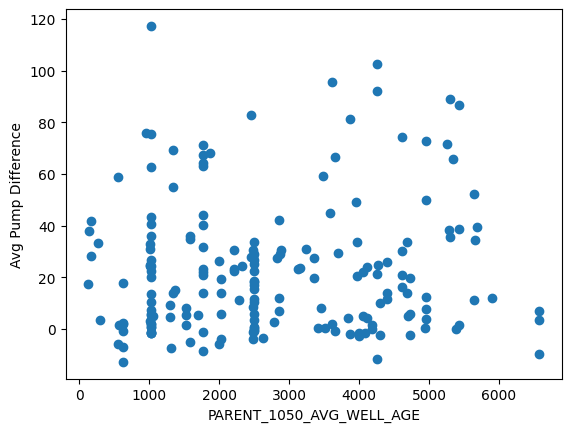

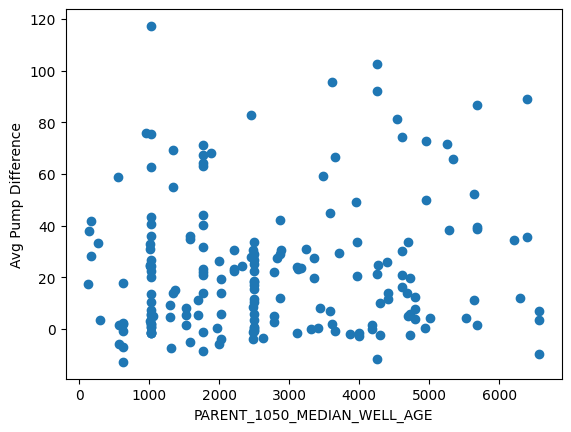

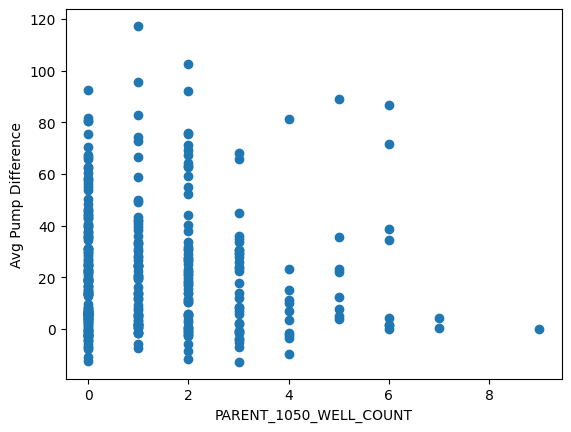

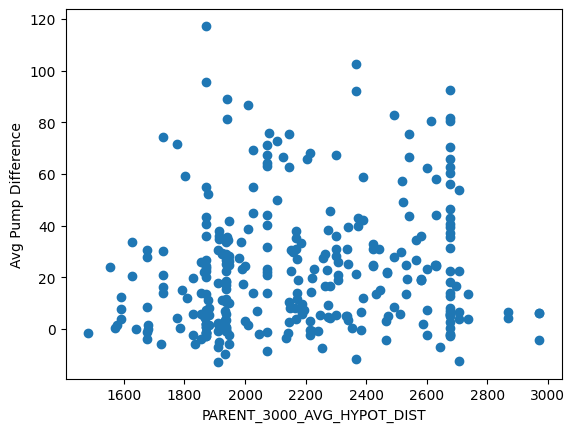

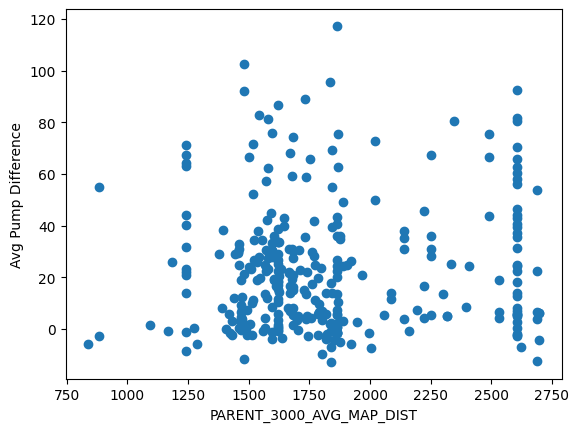

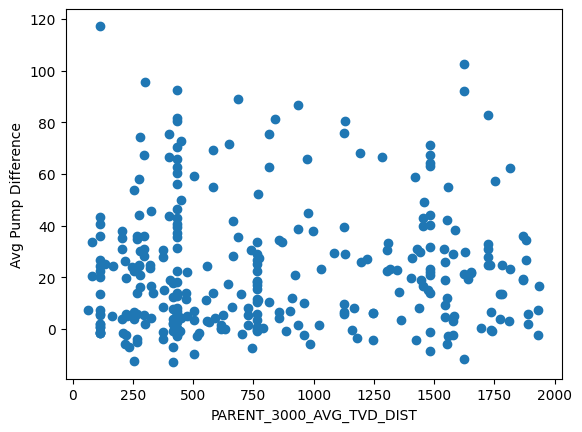

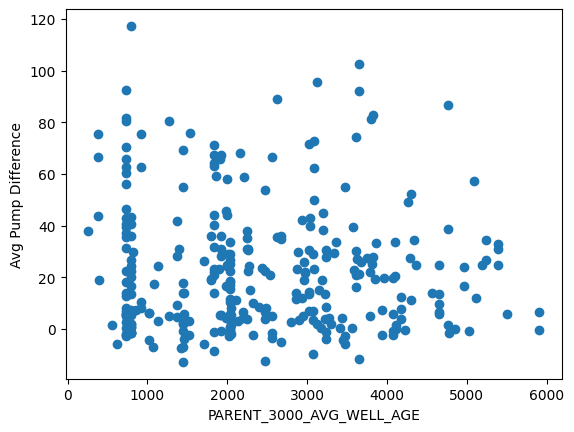

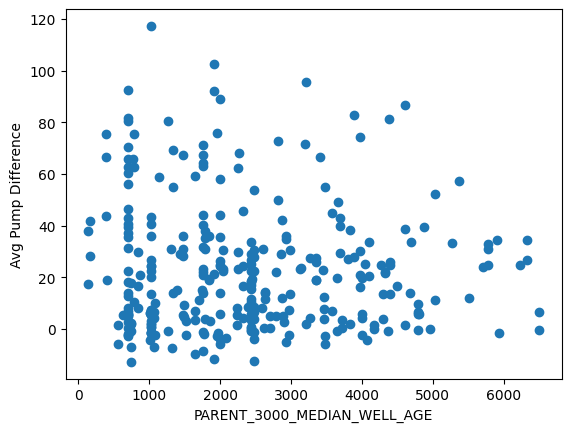

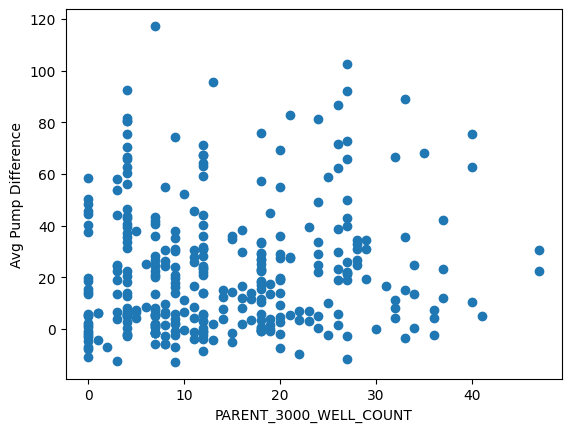

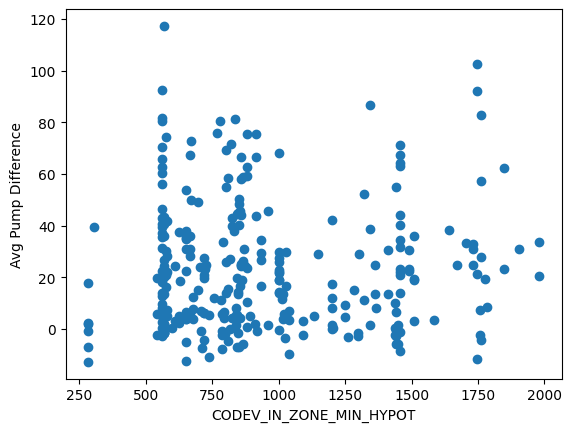

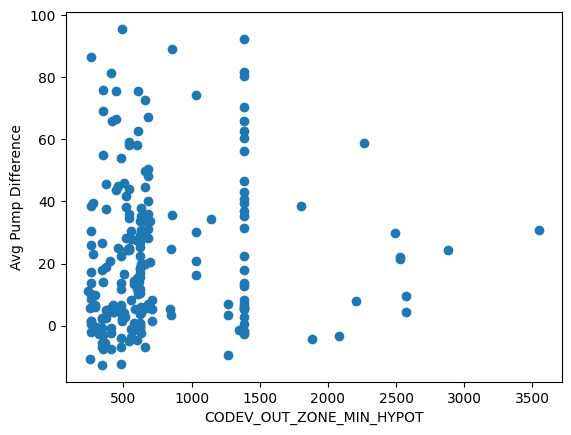

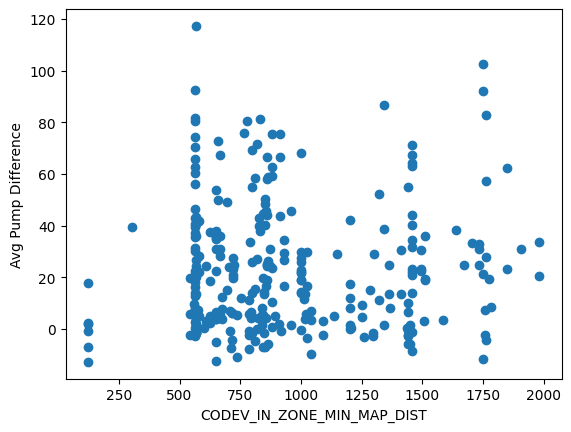

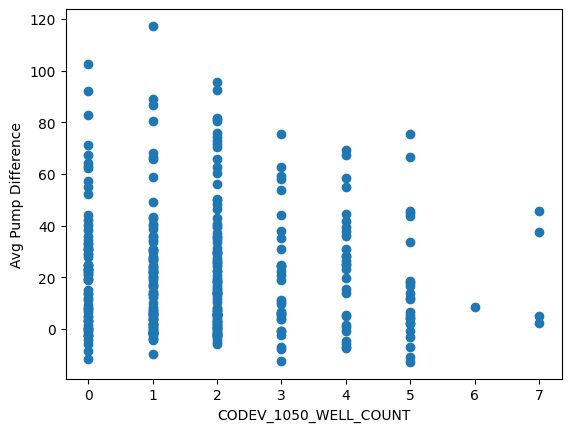

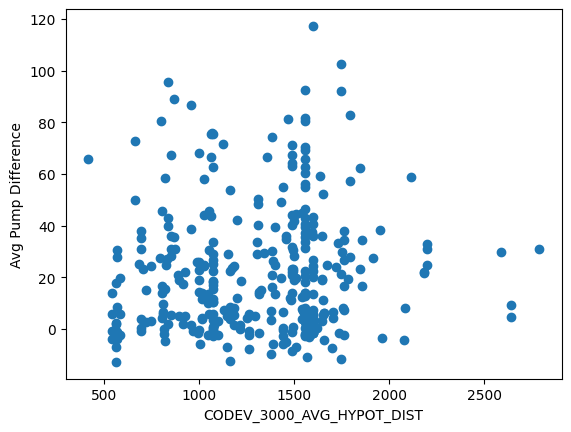

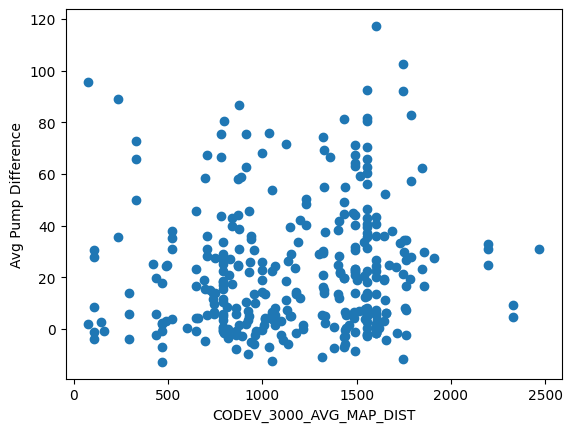

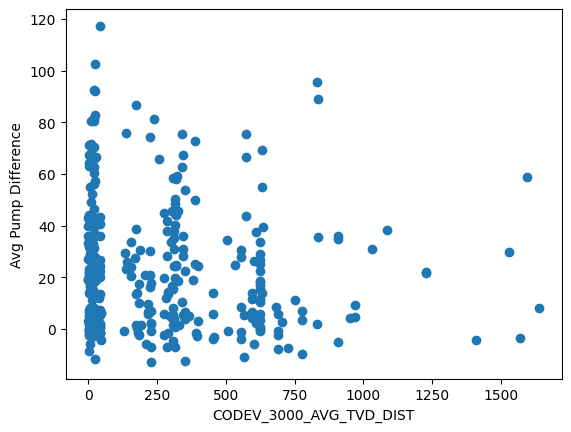

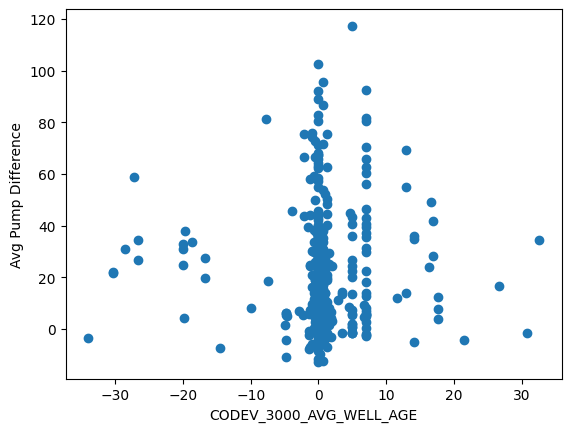

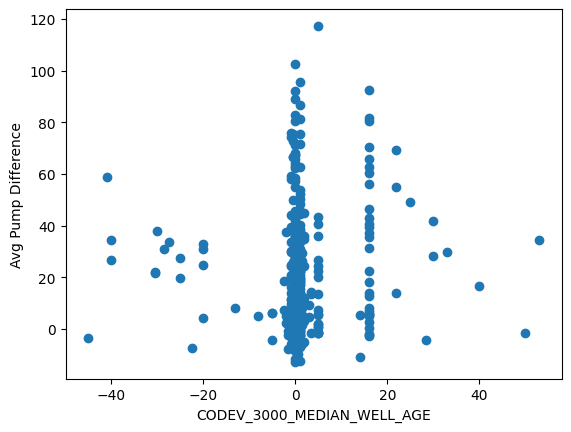

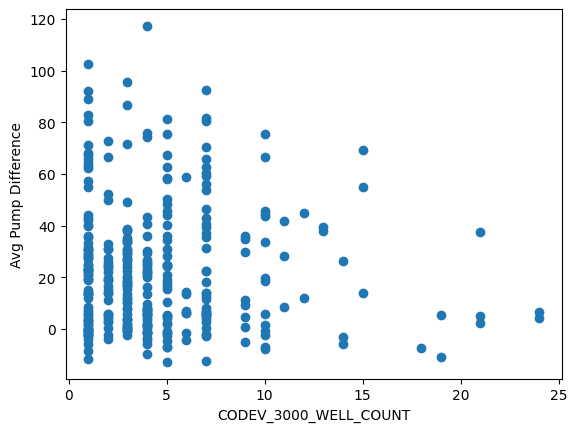

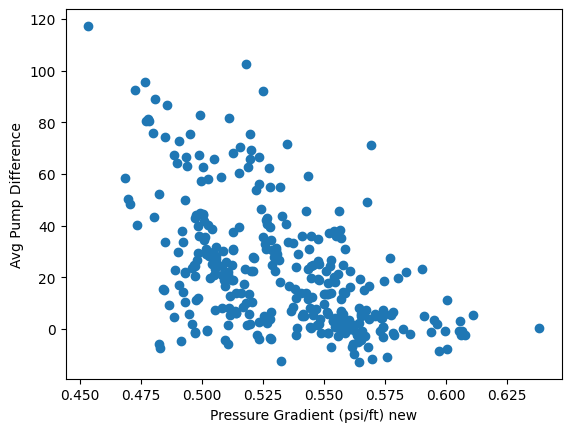

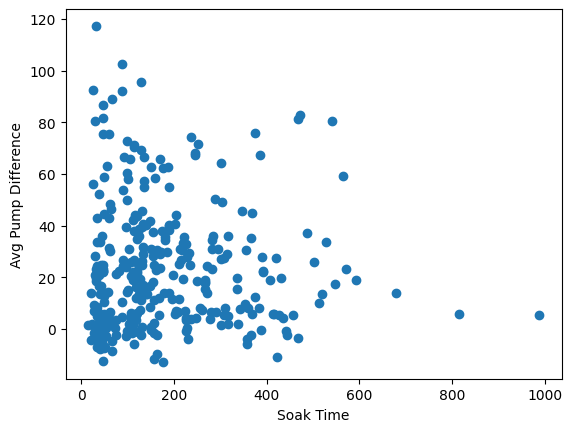

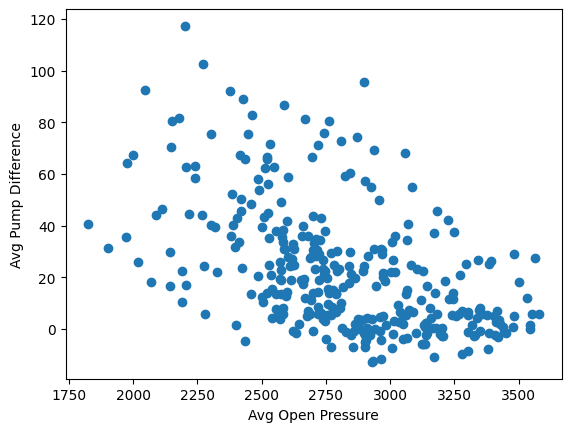

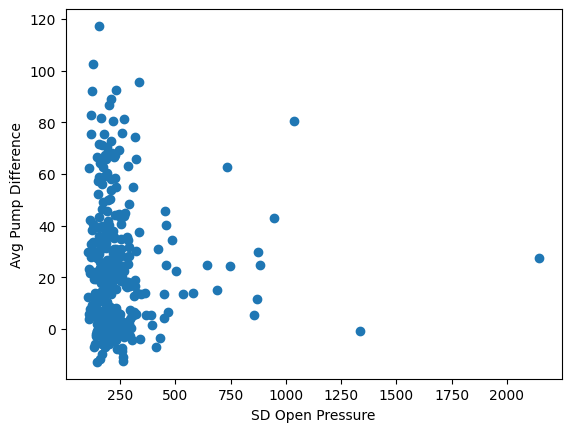

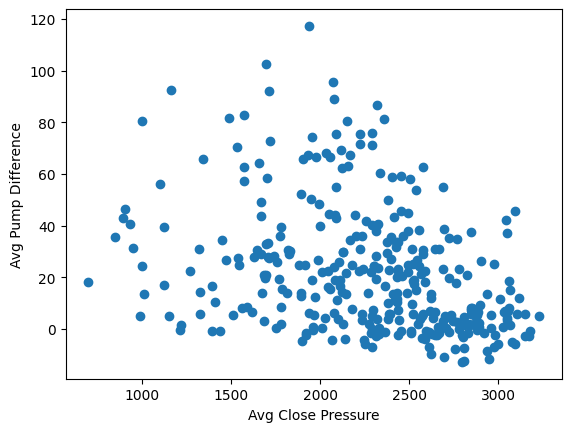

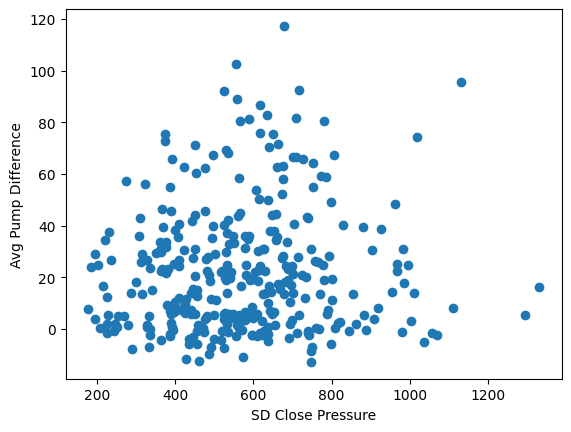

In [3]:
for x_name in df:    
    if (x_name != 'Fluid System'):
        plt.xlabel(x_name)
        plt.ylabel('Avg Pump Difference')
        plt.scatter(df[x_name], response)
        plt.show()

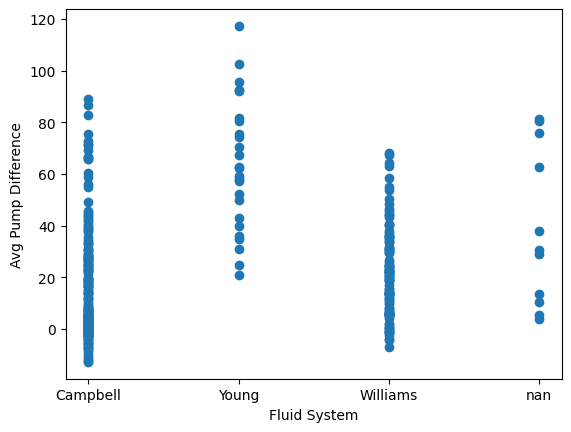

In [14]:
plt.xlabel('Fluid System')
plt.ylabel('Avg Pump Difference')
plt.scatter(df['Fluid System'].astype(str), response)
plt.show()

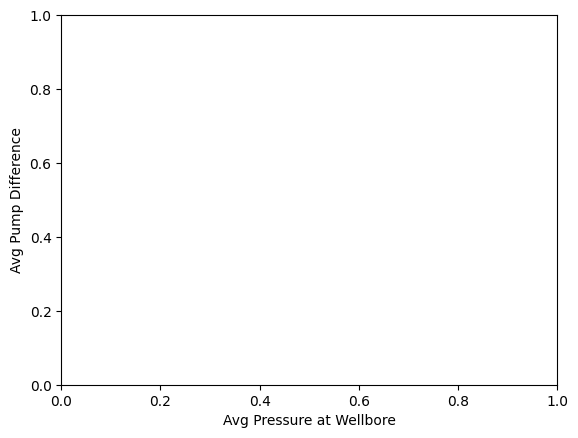

In [4]:
df['Avg Pressure at Wellbore'] = (df['Pressure Gradient (psi/ft) new'] * df['TVD'])
plt.xlabel('Avg Pressure at Wellbore')
plt.ylabel('Avg Pump Difference')
#plt.scatter(wellbore_pressure, response)
plt.show()

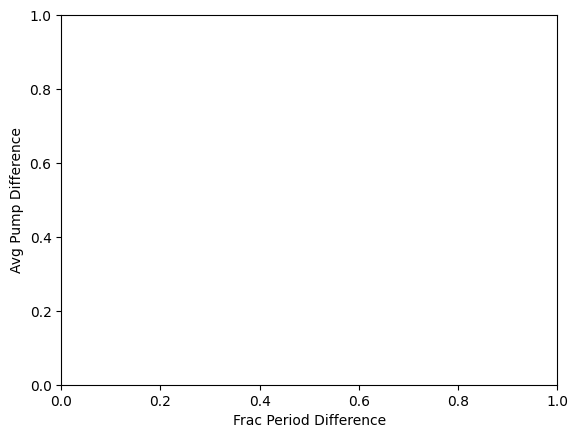

In [5]:
df['Frac Period Difference'] = (df['Avg Close Pressure'] - df['Avg Open Pressure'])
plt.xlabel('Frac Period Difference')
plt.ylabel('Avg Pump Difference')
#plt.scatter(frac_diff, response)
plt.show()

In [6]:
def get_interest_features(x, y, z, dataframe):
    dataframe = dataframe[[x, y, z]]
    return dataframe


def create_characteristics_plot(interest_dataframe):
    sns.scatterplot(y=interest_dataframe[interest_dataframe.columns[0]],
                    x=interest_dataframe[interest_dataframe.columns[1]],
                    hue=interest_dataframe[interest_dataframe.columns[2]])
    plt.title(f"{interest_dataframe.columns[0]} over {interest_dataframe.columns[1]}");
    
create_characteristics_plot(get_interest_features('', 'Soak', 'Soak Time', df))



KeyError: "['', 'Soak'] not in index"

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hu

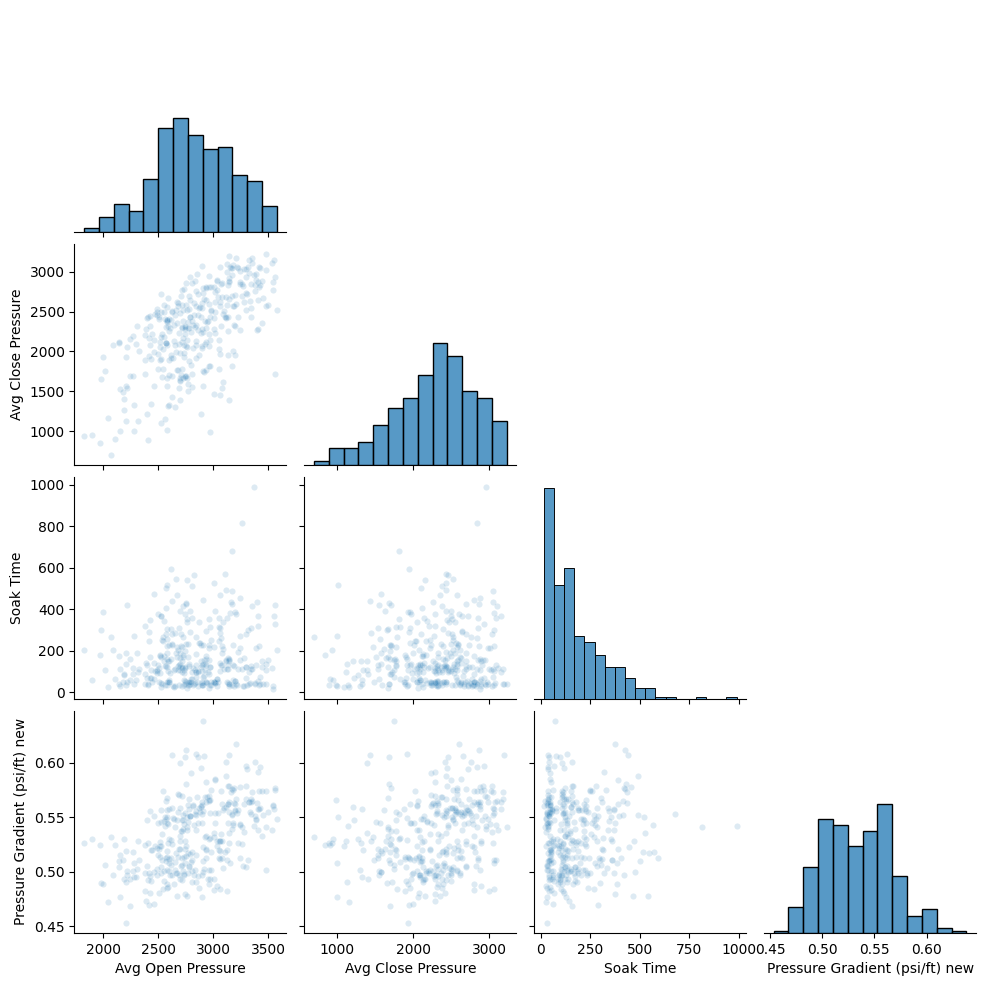

In [10]:
#top4 = ['PARENT_IN_ZONE_MIN_MAP_DIST', 'CODEV_OUT_ZONE_MIN_HYPOT', 'CODEV_1050_WELL_COUNT', 'Pressure Gradient (psi/ft) new']

imputed_df = pd.read_csv('ImputedValues.csv')

top4 = pd.DataFrame()
top4['Avg Open Pressure'] = imputed_df['Avg Open Pressure']
top4['Avg Close Pressure'] = imputed_df['Avg Close Pressure']
top4['Soak Time'] = imputed_df['Soak Time']
top4['Pressure Gradient (psi/ft) new'] = imputed_df['Pressure Gradient (psi/ft) new']


sns.pairplot(top4.iloc[:,:], plot_kws={'alpha':0.15,'s':20}, palette = 'gnuplot', corner=True)

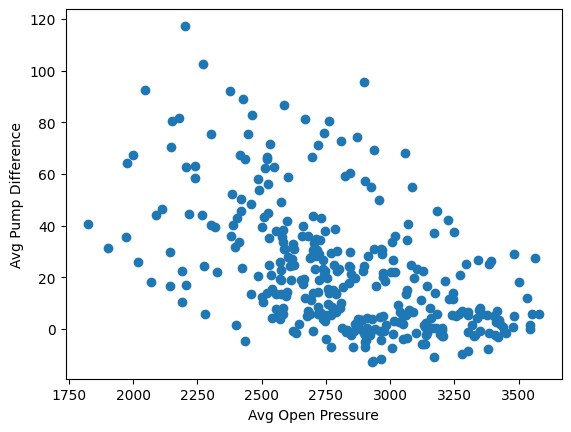

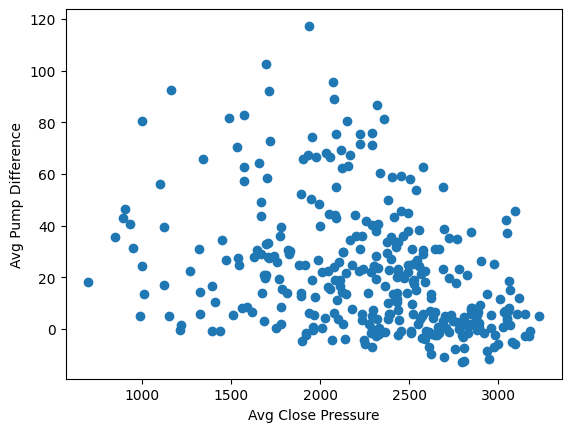

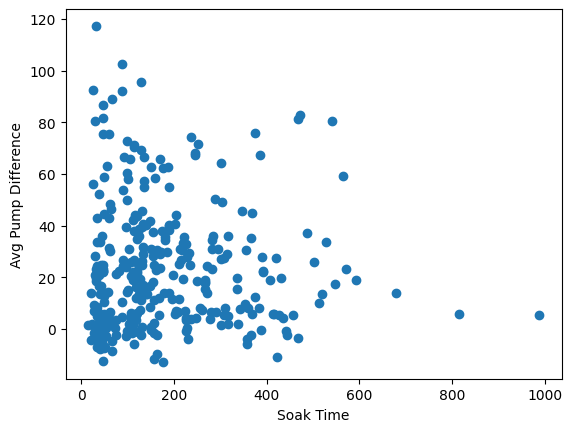

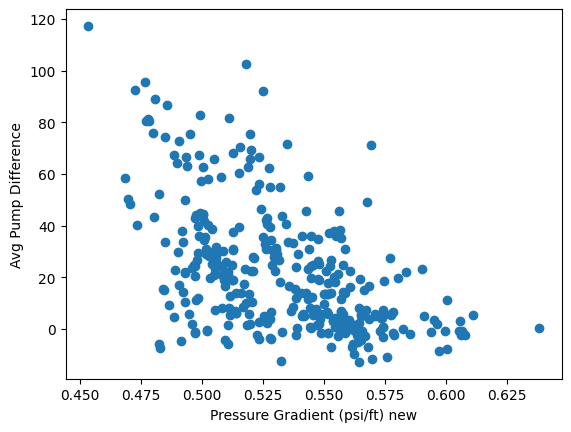

In [11]:
for x in top4:
    plt.xlabel(x)
    plt.ylabel('Avg Pump Difference')
    plt.scatter(top4[x], df['Avg Pump Difference'])
    plt.show()